In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')
sns.set_palette("viridis")
sns.set_theme(style="whitegrid")

### 1. Data Loading


In [2]:
df = pd.read_csv('payroll_raw.csv')

df

,emp_id,gender,dept,total_months,working_days,absent_days,total_leaves,previous_salary,performance_rating,current_salary,is_risk
0,1001,Male,NaN,109,22.0,1.0,4,138967.0,6,155860.763249,0
1,1002,Female,Sales,3,25.0,3.0,7,128691.0,8,119885.093612,0
2,1003,Male,NaN,86,25.0,NaN,1,88756.0,1,NaN,1
3,1004,Male,Ops,48,23.0,6.0,12,81407.0,3,101587.198950,0
4,1005,Male,Finance,102,25.0,2.0,1,42522.0,7,43348.621874,0
...,...,...,...,...,...,...,...,...,...,...,...
54495,17571,Male,Finance,62,22.0,NaN,0,119145.0,5,129928.084405,0
54496,28551,Female,Tech,49,23.0,NaN,1,107783.0,5,97976.962822,0
54497,2640,Female,NaN,115,23.0,5.0,3,33827.0,9,31016.424240,0
54498,4650,Male,HR,38,24.0,7.0,7,148209.0,4,169955.589184,0


In [3]:
df.shape

(54500, 11)

In [4]:
df.columns

Index(['emp_id', 'gender', 'dept', 'total_months', 'working_days',
       'absent_days', 'total_leaves', 'previous_salary', 'performance_rating',
       'current_salary', 'is_risk'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54500 entries, 0 to 54499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   emp_id              54500 non-null  int64  
 1   gender              54500 non-null  object 
 2   dept                51780 non-null  object 
 3   total_months        54500 non-null  int64  
 4   working_days        51768 non-null  float64
 5   absent_days         51777 non-null  float64
 6   total_leaves        54500 non-null  int64  
 7   previous_salary     51779 non-null  float64
 8   performance_rating  54500 non-null  int64  
 9   current_salary      51771 non-null  float64
 10  is_risk             54500 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 4.6+ MB


In [6]:
df.isnull().sum()

emp_id                   0
gender                   0
dept                  2720
total_months             0
working_days          2732
absent_days           2723
total_leaves             0
previous_salary       2721
performance_rating       0
current_salary        2729
is_risk                  0
dtype: int64

In [7]:
df.dtypes

emp_id                  int64
gender                 object
dept                   object
total_months            int64
working_days          float64
absent_days           float64
total_leaves            int64
previous_salary       float64
performance_rating      int64
current_salary        float64
is_risk                 int64
dtype: object

In [8]:
df.describe()

,emp_id,total_months,working_days,absent_days,total_leaves,previous_salary,performance_rating,current_salary,is_risk
count,54500.000000,54500.000000,51768.000000,51777.000000,54500.000000,51779.000000,54500.000000,51771.000000,54500.000000
mean,28002.684789,60.072624,22.491829,4.482685,6.996440,90214.909114,5.499101,99121.088409,0.198881
std,15585.636562,34.333423,1.704845,2.873534,4.323204,34590.580015,2.867999,39609.734352,0.399162
min,1001.000000,1.000000,20.000000,0.000000,0.000000,30000.000000,1.000000,27145.473457,0.000000
25%,14515.750000,30.000000,21.000000,2.000000,3.000000,60409.500000,3.000000,65548.887104,0.000000
50%,28008.500000,60.000000,22.000000,4.000000,7.000000,90164.000000,5.000000,98081.659166,0.000000
75%,41495.250000,90.000000,24.000000,7.000000,11.000000,120192.000000,8.000000,130560.701573,0.000000
max,55000.000000,119.000000,25.000000,9.000000,14.000000,149999.000000,10.000000,194667.502588,1.000000


### 2. Preprocessing & Data Cleaning
**Requirement:** Handle missing values, remove duplicates, and encode categorical variables.

In [9]:
# Removing Duplicates

initial_shape = df.shape
df.drop_duplicates(inplace=True)
print(f"\nDuplicates Removed: {initial_shape[0] - df.shape[0]}")


Duplicates Removed: 500


In [10]:
# Handling Missing Values

df.fillna(df.median(numeric_only=True), inplace=True)
for col in ['dept']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [11]:
df.isnull().sum()

emp_id                0
gender                0
dept                  0
total_months          0
working_days          0
absent_days           0
total_leaves          0
previous_salary       0
performance_rating    0
current_salary        0
is_risk               0
dtype: int64

In [12]:
# Encoding Categorical Variables

le = LabelEncoder()
df['dept_enc'] = le.fit_transform(df['dept'])
df['gender_enc'] = le.fit_transform(df['gender'])

print(f"\n✅ Preprocessing Complete. Final Dataset Size: {len(df)}")


✅ Preprocessing Complete. Final Dataset Size: 54000


In [13]:
df[['dept_enc','gender_enc']].head()

,dept_enc,gender_enc
0,4,1
1,3,0
2,4,1
3,2,1
4,0,1


### 4. Feature Engineering 
**Requirement:** Engineer features from Attendance patterns, Leave frequency, and Salary changes.

In [14]:
# A. Attendance Patterns (Attendance Rate)
df['attendance_rate'] = (df['working_days'] - df['absent_days']) / df['working_days']

# B. Leave Frequency (Leaves per normalized month)
df['leave_frequency'] = df['total_leaves'] / df['total_months']

# C. Salary Changes (Percentage Growth/Decline)
df['salary_change_pct'] = (df['current_salary'] - df['previous_salary']) / (df['previous_salary'] + 1)

print("✅ Requirement-based Feature Engineering Successful.")

✅ Requirement-based Feature Engineering Successful.


In [15]:
df[['attendance_rate','leave_frequency','salary_change_pct']].head()


,attendance_rate,leave_frequency,salary_change_pct
0,0.954545,0.036697,0.121566
1,0.880000,2.333333,-0.068426
2,0.840000,0.011628,0.104975
3,0.739130,0.250000,0.247890
4,0.920000,0.009804,0.019439


In [16]:
df[['attendance_rate','leave_frequency','salary_change_pct']].isna().sum()


attendance_rate      0
leave_frequency      0
salary_change_pct    0
dtype: int64

In [17]:
df[['attendance_rate','leave_frequency','salary_change_pct']].sample(5)


,attendance_rate,leave_frequency,salary_change_pct
4424,0.909091,0.300000,0.517861
33718,0.666667,0.133333,0.029079
16077,0.954545,0.282051,0.149882
42000,0.840000,0.000000,-0.173691
29323,0.958333,0.139535,0.029864


In [18]:
df[['attendance_rate','leave_frequency','salary_change_pct']].describe()


,attendance_rate,leave_frequency,salary_change_pct
count,54000.000000,54000.000000,54000.000000
mean,0.800496,0.315812,0.109172
std,0.126541,0.930070,0.207466
min,0.550000,0.000000,-0.688325
25%,0.695652,0.054054,-0.008523
50%,0.809524,0.116883,0.097989
75%,0.909091,0.230769,0.206181
max,1.000000,14.000000,2.265334



**Requirement:** Attendance vs Risk , Leave Frequency vs Risk , Performance Rating vs Risk , Monthly Salary vs Risk 

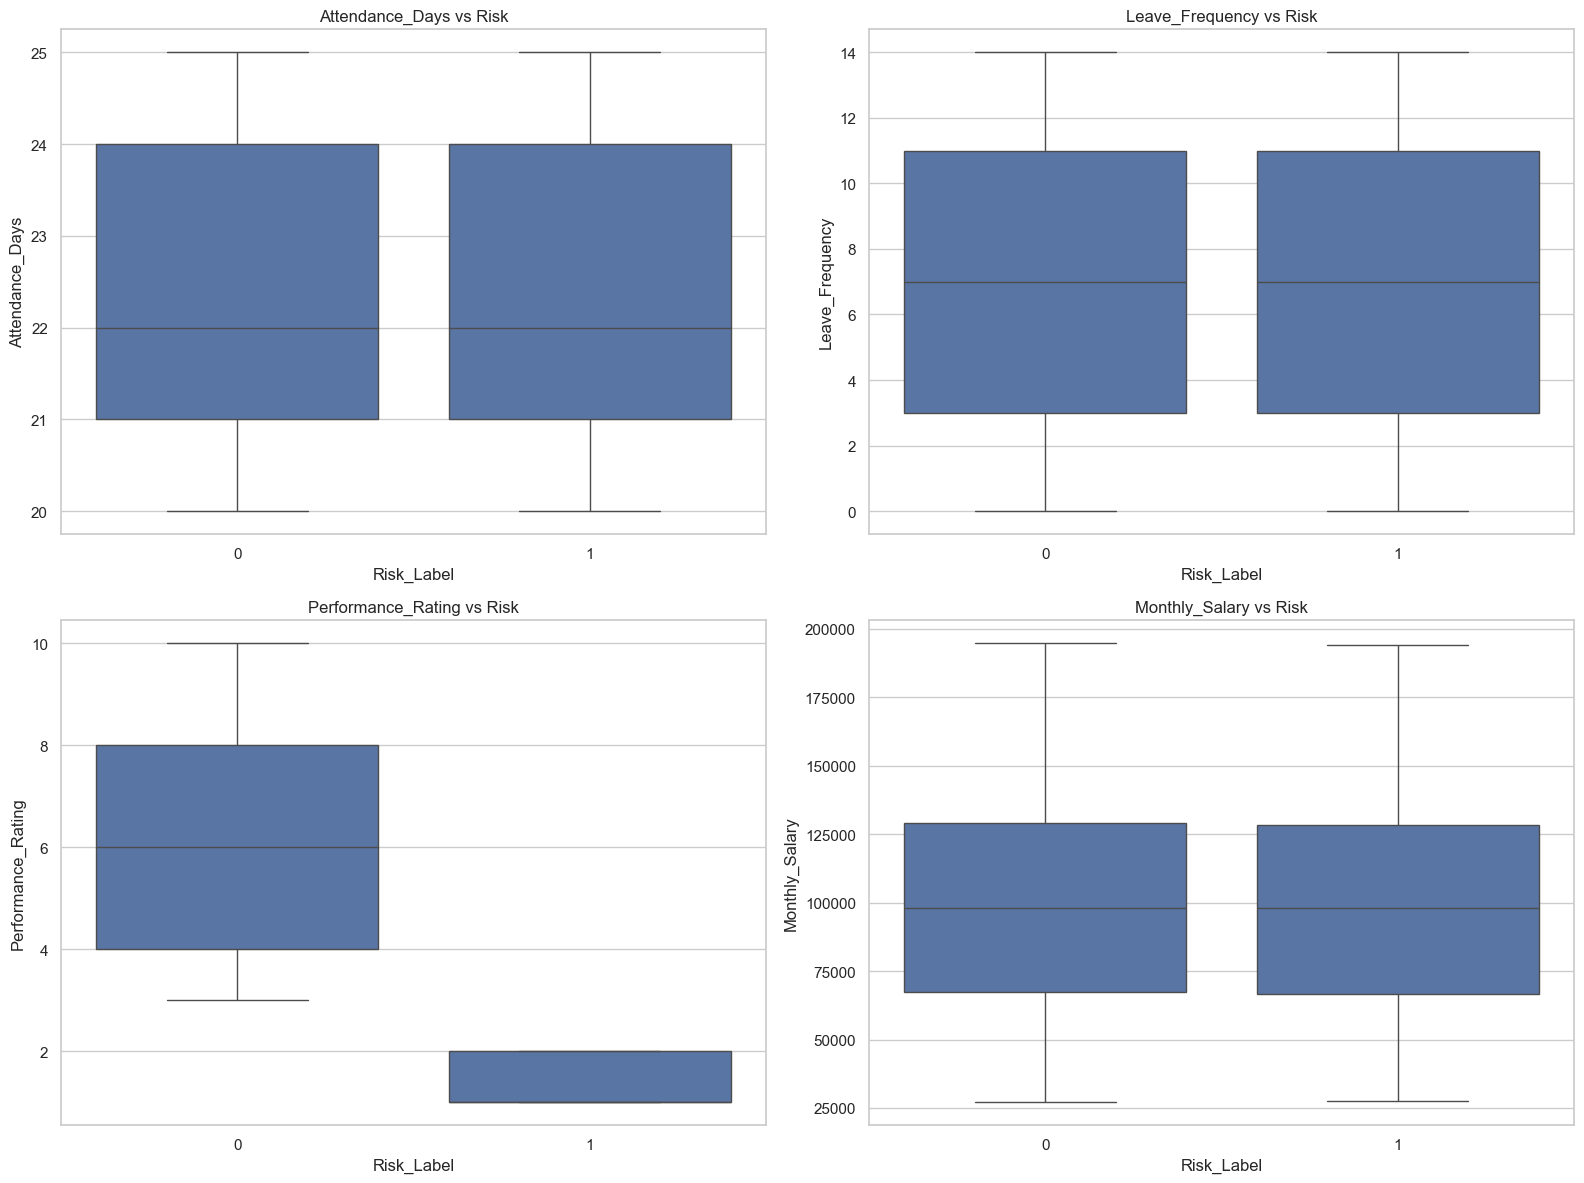

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Attendance vs Risk
sns.boxplot(x='is_risk', y='working_days', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Attendance_Days vs Risk')
axes[0, 0].set_xlabel('Risk_Label')
axes[0, 0].set_ylabel('Attendance_Days')

# 2. Leave Frequency vs Risk
sns.boxplot(x='is_risk', y='total_leaves', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Leave_Frequency vs Risk')
axes[0, 1].set_xlabel('Risk_Label')
axes[0, 1].set_ylabel('Leave_Frequency')

# 3. Performance Rating vs Risk
sns.boxplot(x='is_risk', y='performance_rating', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Performance_Rating vs Risk')
axes[1, 0].set_xlabel('Risk_Label')
axes[1, 0].set_ylabel('Performance_Rating')

# 4. Monthly Salary vs Risk
sns.boxplot(x='is_risk', y='current_salary', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Monthly_Salary vs Risk')
axes[1, 1].set_xlabel('Risk_Label')
axes[1, 1].set_ylabel('Monthly_Salary')

plt.tight_layout()
plt.show()

### 5. Predict: Model Comparison
**Requirement:** Predict high-risk records and compare 3 models.

In [20]:
features = ['attendance_rate', 'leave_frequency', 'salary_change_pct','dept_enc','gender_enc']
X = df[features]
y = df['is_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': round(accuracy_score(y_test, y_pred), 4),
        'F1-Score': round(f1_score(y_test, y_pred), 4)
    })

print("--- Model Comparison Table ---")
display(pd.DataFrame(results))


--- Model Comparison Table ---


,Model,Accuracy,F1-Score
0,Logistic Regression,0.8010,0.0000
1,Random Forest,0.7867,0.0344
2,XGBoost,0.7987,0.0073


### 7.  Mathematical Justification
Decision tree models like **Random Forest** and **XGBoost** are mathematically superior for this payroll system because risk is defined by overlapping logical thresholds (e.g. IF attendance < X AND leave > Y). Trees handle these recursive partitions by maximizing **Information Gain**:
$$ IG(D, a) = Entropy(D) - \sum_{v\in Values(a)} \frac{|D_v|}{|D|} Entropy(D_v) $$
This allows the models to isolate high-risk samples with precision that simple linear vectors fail to achieve.

In [21]:
df[['attendance_rate', 'leave_frequency', 'salary_change_pct']].head()

,attendance_rate,leave_frequency,salary_change_pct
0,0.954545,0.036697,0.121566
1,0.880000,2.333333,-0.068426
2,0.840000,0.011628,0.104975
3,0.739130,0.250000,0.247890
4,0.920000,0.009804,0.019439


### 6. Outcome: Feature  Analysis

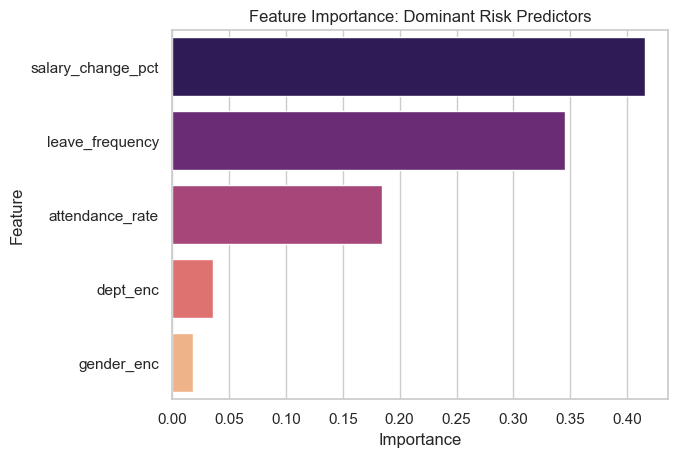

In [22]:
rf = models['Random Forest']
imp_df = pd.DataFrame({'Feature': features, 'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=imp_df, palette='magma')
plt.title('Feature Importance: Dominant Risk Predictors')
plt.show()